# What is Diamonds Prices Dataset?
This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.
There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import gradio as gr
import warnings 

warnings.filterwarnings('ignore')



In [2]:
dp = pd.read_csv('Diamonds Prices2022.csv',index_col= 0 )
dp

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
#details on the column dtype
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# EDA

In [4]:
#display the sum of empty columns
dp.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

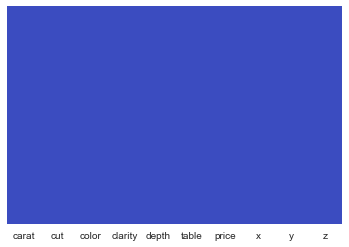

In [5]:
#dvisual isplay the sum of empty columns
sns.heatmap(dp.isnull(),yticklabels = False,cbar = False,cmap = 'coolwarm')

In [6]:
#the amount of unique data in each coulmn
dp.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [7]:
dp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [8]:
#coeffeicient correlation between the items
dp.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


<AxesSubplot:>

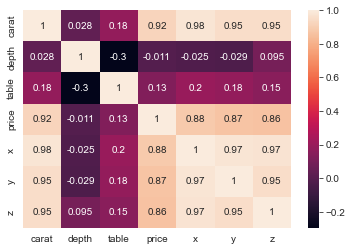

In [9]:
#visual display of the coeffeicient correlation between the items
sns.heatmap(dp.corr(), annot = True)

In [10]:
#coeffeicient correlation between the factors and how they affect price
dp.corr()['price'].sort_values()[:-1]

depth   -0.010630
table    0.127118
z        0.861249
y        0.865419
x        0.884433
carat    0.921591
Name: price, dtype: float64

<AxesSubplot:>

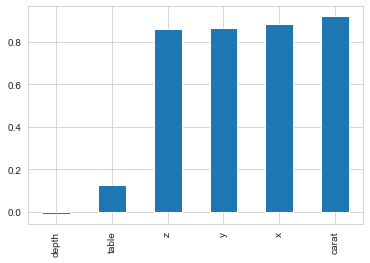

In [11]:
#visual correlation of the charges to the other factors
dp.corr()['price'].sort_values()[:-1].plot(kind = 'bar')

<AxesSubplot:xlabel='price', ylabel='Density'>

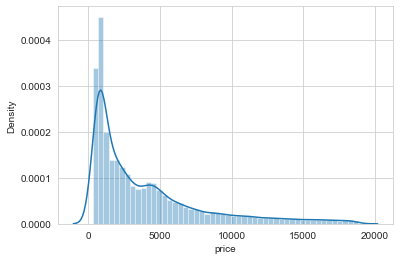

In [12]:
#distribution of target
sns.distplot(dp['price'])

#diamonds are expensive so we cant figure out the outliers

<AxesSubplot:xlabel='carat', ylabel='Density'>

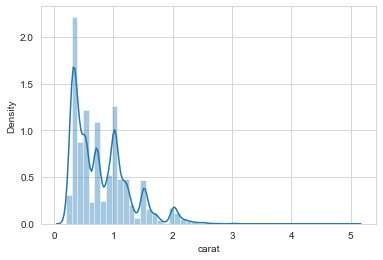

In [13]:
sns.distplot(dp['carat'])
#seems a flunctuation in the carat value but price increase

In [14]:
dp[dp['price'] <= 10000]['carat'].sort_values(ascending= False).head(25)
#can guess that diaonds with less than 10k price, the carats are within a arange not greater than 2.74 with few exceptions making it a 3.0

21759    3.11
21863    3.01
19340    3.01
16284    3.00
19347    3.00
20463    2.74
17197    2.72
21567    2.68
19867    2.68
20298    2.50
19922    2.50
19082    2.50
15685    2.49
21626    2.43
19947    2.34
19599    2.33
17182    2.32
17957    2.31
17898    2.30
20839    2.28
17692    2.27
14139    2.27
17561    2.25
20852    2.25
19895    2.25
Name: carat, dtype: float64

In [15]:
dp[dp['price'] >= 10000]['carat'].sort_values(ascending= False).head(25)

27416    5.01
27631    4.50
27131    4.13
25999    4.01
26000    4.01
26445    4.00
26535    3.67
23645    3.65
27680    3.51
24329    3.50
26432    3.40
24132    3.24
24298    3.22
22429    3.05
26101    3.04
27639    3.04
22541    3.02
25461    3.01
27650    3.01
26468    3.01
27685    3.01
27686    3.01
27515    3.01
26745    3.01
27519    3.01
Name: carat, dtype: float64

<AxesSubplot:xlabel='color', ylabel='count'>

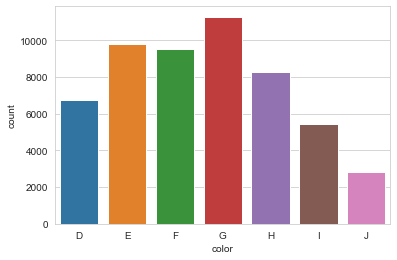

In [16]:

X = sorted(dp['color'].unique())
sns.countplot(x = 'color',data = dp, order = X)
#we have more G diamond color 

<AxesSubplot:xlabel='color', ylabel='price'>

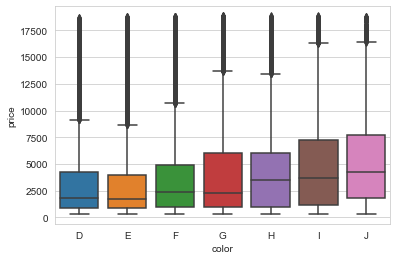

In [17]:
sns.boxplot(x = 'color',y = 'price',data = dp, order = X)
#J diamond is the most expensive dismond

<AxesSubplot:xlabel='color', ylabel='depth'>

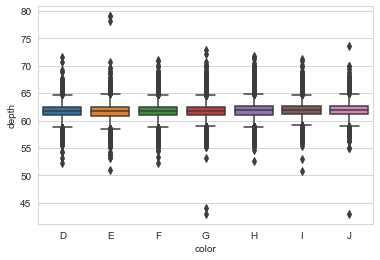

In [18]:
sns.boxplot(x = 'color',y = 'depth',data = dp, order = X)
#J diamond is the most expensive dismond

<AxesSubplot:xlabel='color', ylabel='carat'>

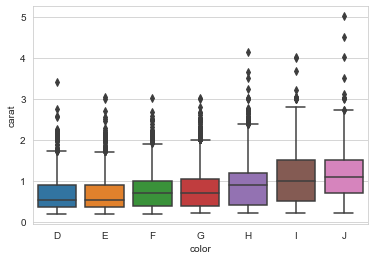

In [19]:
sns.boxplot(x = 'color',y = 'carat',data = dp, order = X)
#J diamond  also contains mored depth 

<AxesSubplot:xlabel='cut', ylabel='price'>

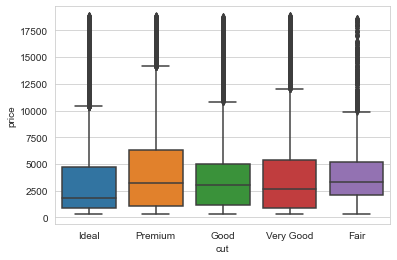

In [20]:
sns.boxplot(x = 'cut',y = 'price',data = dp)
#premium cut is the most expensive

<AxesSubplot:xlabel='cut', ylabel='count'>

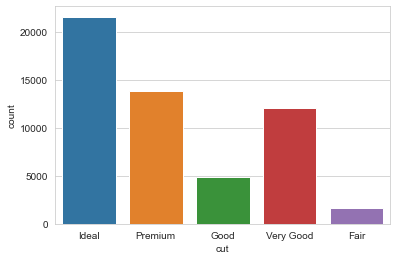

In [21]:
sns.countplot(x = 'cut',data = dp)
#more ideal cut in the diamond

<AxesSubplot:xlabel='clarity', ylabel='price'>

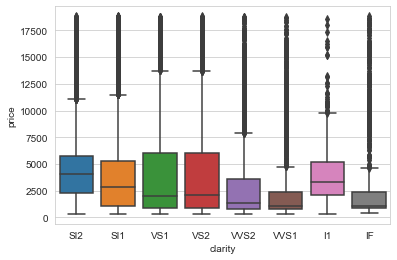

In [22]:
sns.boxplot(x = 'clarity',y = 'price',data = dp)
#s12 seems t

# DATA PREPROCESSING

In [23]:
dp

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


# Encoding the Independent Variable

In [24]:
NewCut = pd.get_dummies(dp['cut'])
NewColor = pd.get_dummies(dp['color'])
NewClarity = pd.get_dummies(dp['clarity'])
dp.drop(['cut','color','clarity'],axis = 1, inplace = True)
dp=pd.concat([dp, NewClarity, NewColor, NewCut],axis = 1)
dp

,carat,depth,table,price,x,y,z,I1,IF,SI1,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,1,0,0,0,0,0,1,0
53940,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53941,0.71,60.5,55.0,2756,5.79,5.74,3.49,0,0,1,...,0,0,0,0,0,0,0,0,1,0
53942,0.71,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [25]:
X = dp.drop('price', axis = 1).values
y= dp['price'].values

### Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

# DECISION TREE REGRESSION

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[  559.   559.]
 [ 8557.  8403.]
 [ 1238.  1238.]
 ...
 [  827.   628.]
 [ 8950.  9290.]
 [16929. 12377.]]


# Evaluating the Model Performance

In [28]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

369.24704729622374
566957.4910094804
752.9657967062517
0.963668622855325


# Scaling and Train Test Split

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Simple Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[  700.   559.]
 [ 8120.  8403.]
 [  308.  1238.]
 ...
 [  628.   628.]
 [ 8168.  9290.]
 [15020. 12377.]]


# Evaluating the Model Performance

In [31]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

733.6159101742493
1240985.5073354165
1113.9952905355644
0.9204760264869222


# Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly = LinearRegression()
poly.fit(X_poly, y_train)
predictions = poly.predict(poly_reg.fit_transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[  451.5   559. ]
 [ 8951.   8403. ]
 [ 1479.5  1238. ]
 ...
 [  357.    628. ]
 [ 8984.   9290. ]
 [16050.  12377. ]]


# Evaluating the Model Performance

In [33]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

410.06768709284466
1091452.9213296436
1044.7262422901244
0.9300582700655743


#  Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressorR = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressorR.fit(X_train, y_train)
predictions = regressorR.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[  558.    559. ]
 [ 8550.9  8403. ]
 [ 1285.5  1238. ]
 ...
 [  669.1   628. ]
 [ 8493.3  9290. ]
 [16594.6 12377. ]]


# Evaluating the Model Performance

In [35]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

290.0544136963085
338182.3586508892
581.5344862094502
0.9783288323892774


# Support Vector Regression (SVR)

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
X_test = sc_X.fit_transform(X_test)
predictions = regressor.predict((X_test))
predictions = sc_y.inverse_transform(predictions.reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[  904.13   559.  ]
 [ 8940.18  8403.  ]
 [ 1375.41  1238.  ]
 ...
 [  855.41   628.  ]
 [ 8376.83  9290.  ]
 [16116.76 12377.  ]]


# # Evaluating the Model Performance

In [37]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

348.02502627909496
369458.5641049984
607.8310325287764
0.9763246122598557


# Comment

The Random forest generated the best model with a price range of mean average (+ or - 290) and a r2 score of 97.83

In [38]:
dp['depth'].max()

79.0

# UI DISPLAY

In [47]:
def diamond_price(name,carat, depth, table, x, y, z, I1, IF, SI1, SI2,
       VS1, VS2, VVS1, VVS2, D, E, F, G, H, I, J, Fair,
       Good, Ideal, Premium, Very_Good):
    
    properties = np.array([[carat, depth, table, x, y, z, I1, IF, SI1, SI2,
       VS1, VS2, VVS1, VVS2, D, E, F, G, H, I, J, Fair,
       Good, Ideal, Premium, Very_Good]])
    
    predictions = regressorR.predict(scaler.transform(properties))
    predictions = str(predictions).strip('[]')
    
    return ('Hey mr/ Miss/ Mrs   ' + name + ' \n The cost of your diamond should be worth $' + str (predictions))



In [48]:
outputs = gr.components.Textbox()

In [49]:
app = gr.Interface(diamond_price, 
                   inputs = ['text',gr.components.Slider(0, 6,label = 'How many carat diamond'),gr.components.Slider(0, 100,label = 'depth of diamond') ,gr.components.Slider(0, 100,label = 'Table of diamond'),'number','number','number',gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity I1'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity IF'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity S11'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity SI2'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity VS1'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity VS2'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity VVS1'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Clarity VVS2'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour D'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour E'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour F'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour G'), gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour H'), gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour I'), gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Colour J'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Grade of cut Fair'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Grade of cut Good'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Grade of cut Ideal') ,gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Grade of cut Premium'),gr.components.Dropdown(choices = ['No', 'Yes'],type ='index',label = 'Grade of cut Very_Good')],
                   outputs = [outputs],
                   title = 'Diamond price 2022',
                   description = 'This helps calculate the price of Diamond  based on the carat,colour,cut,clarity and Angles')

In [50]:
app.launch(gr)

Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x169ca3d90>, 'http://127.0.0.1:7862/', None)